In [9]:
# ==============================
# IBM HR Analytics: Attrition
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:

df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Shape of dataset:", df.shape)       # rows, columns
print("\nColumns:\n", df.columns)          # column names
print("\nAttrition value counts:\n", df['Attrition'].value_counts())


Shape of dataset: (1470, 35)

Columns:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Attrition value counts:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


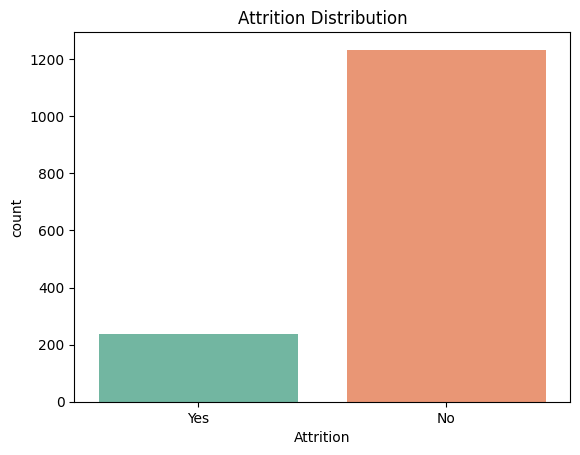

In [11]:

sns.countplot(x='Attrition', data=df, palette="Set2")
plt.title("Attrition Distribution")
plt.show()


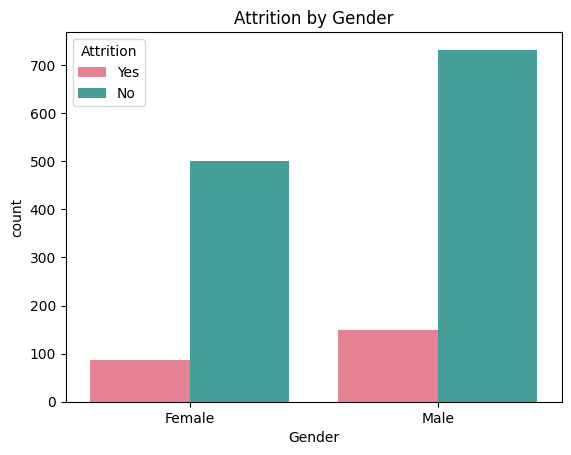

In [12]:
# Compare attrition between Male & Female
sns.countplot(x="Gender", hue="Attrition", data=df, palette="husl")
plt.title("Attrition by Gender")
plt.show()


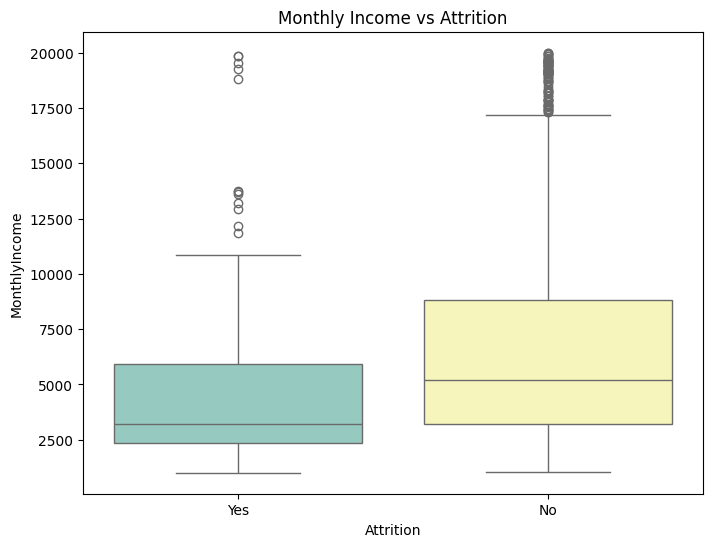

In [13]:
# Salary difference between employees who stayed vs left
plt.figure(figsize=(8,6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="Set3")
plt.title("Monthly Income vs Attrition")
plt.show()


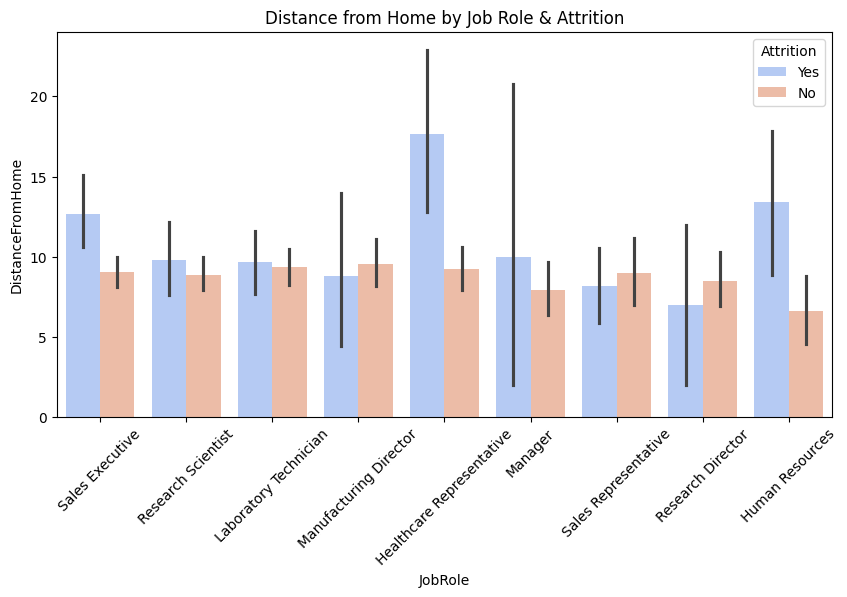

In [14]:
# Distance from home grouped by JobRole and Attrition
plt.figure(figsize=(10,5))
sns.barplot(x="JobRole", y="DistanceFromHome", hue="Attrition", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distance from Home by Job Role & Attrition")
plt.show()


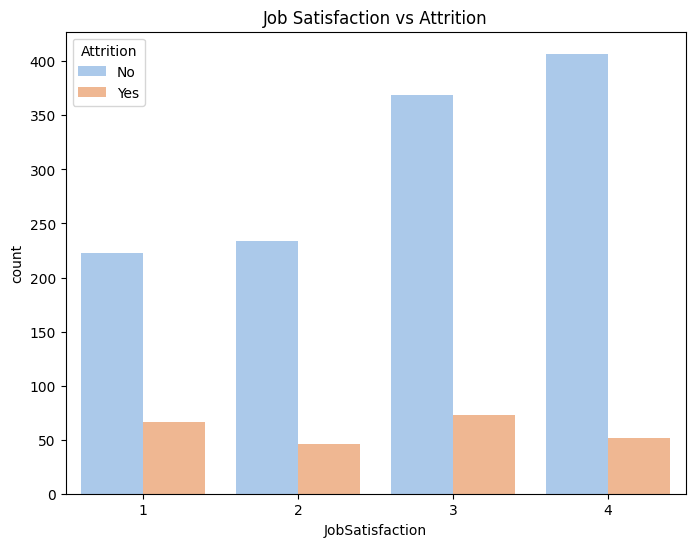

In [15]:
# Job satisfaction levels (1=Low, 4=High) compared with Attrition
plt.figure(figsize=(8,6))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df, palette="pastel")
plt.title("Job Satisfaction vs Attrition")
plt.show()


In [16]:
#  Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = df.copy()


if 'EmployeeNumber' in data.columns:
    data.drop('EmployeeNumber', axis=1, inplace=True)

data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})


cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

X = data.drop('Attrition', axis=1)
y = data['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Training set shape: (1176, 33)
Testing set shape: (294, 33)



--- Logistic Regression ---
Accuracy: 0.8741496598639455

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



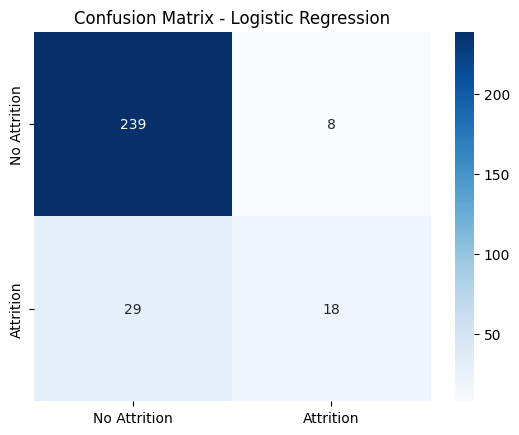

In [17]:
#  Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Attrition","Attrition"], yticklabels=["No Attrition","Attrition"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



--- Decision Tree ---
Accuracy: 0.8401360544217688

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.50      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.68      0.58      0.59       294
weighted avg       0.80      0.84      0.81       294



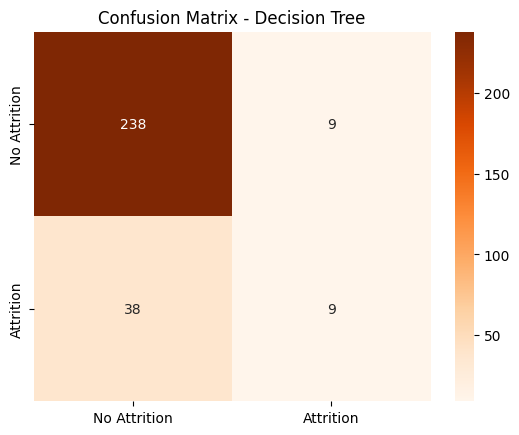

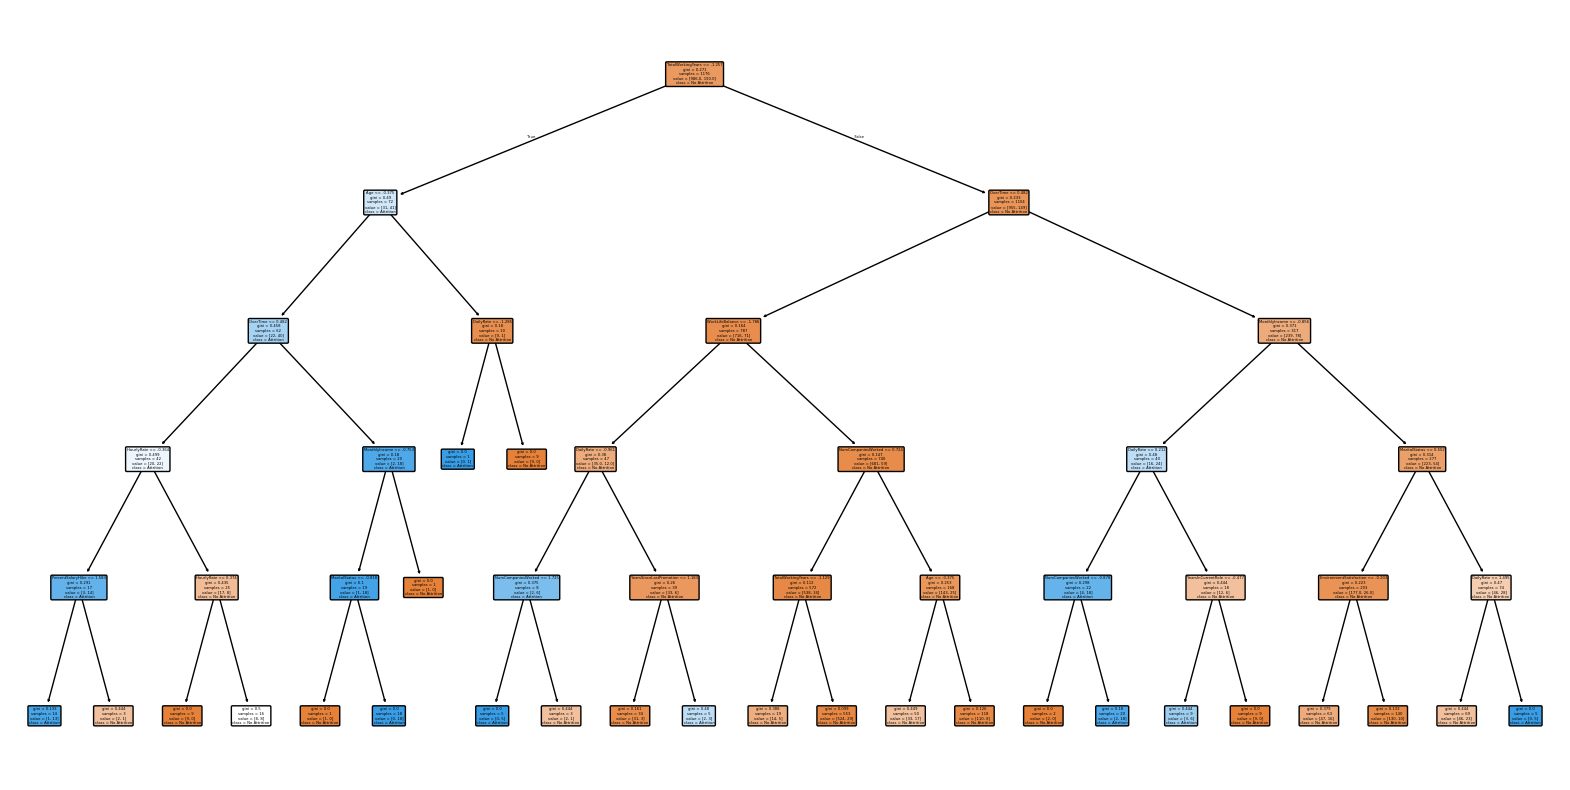

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(
    criterion="gini",    
    max_depth=5,         
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=["No Attrition","Attrition"], yticklabels=["No Attrition","Attrition"])
plt.title("Confusion Matrix - Decision Tree")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Attrition","Attrition"], filled=True, rounded=True)
plt.show()




--- Random Forest ---
Accuracy: 0.8299319727891157

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



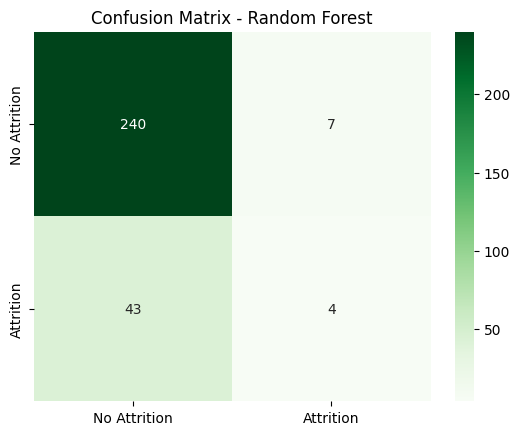

In [19]:
from sklearn.ensemble import RandomForestClassifier

#  Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # trees grow fully unless limited
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=["No Attrition","Attrition"], yticklabels=["No Attrition","Attrition"])
plt.title("Confusion Matrix - Random Forest")
plt.show()



Top 10 Important Features:
                  Feature  Importance
16         MonthlyIncome    0.080465
0                    Age    0.073286
26     TotalWorkingYears    0.057512
2              DailyRate    0.057069
10            HourlyRate    0.049022
4       DistanceFromHome    0.048889
17           MonthlyRate    0.044408
29        YearsAtCompany    0.040094
32  YearsWithCurrManager    0.039906
20              OverTime    0.039336


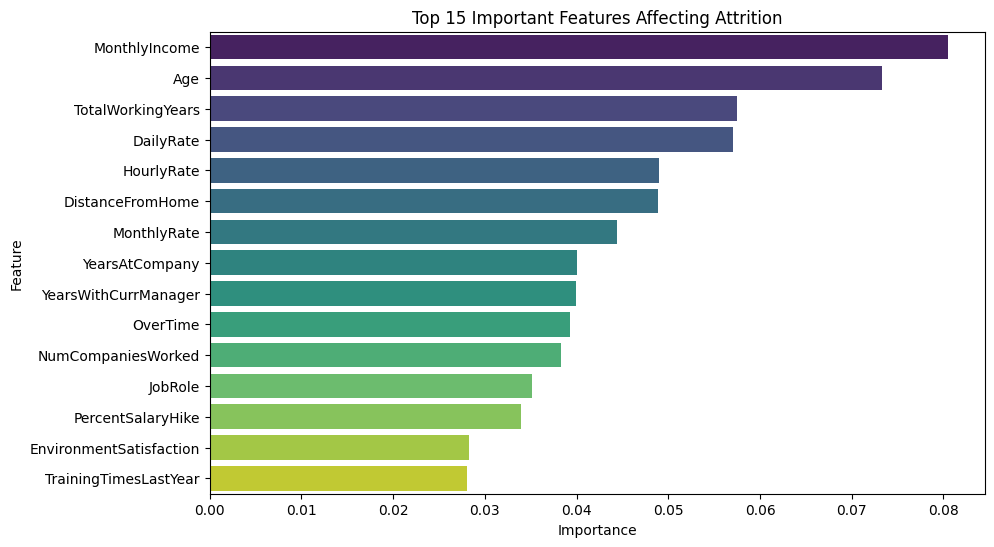

In [20]:
importances = rf_model.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:\n", feat_imp.head(10))

# Plot Top 15
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Important Features Affecting Attrition")
plt.show()


In [21]:
df.head(15)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
